In [1]:
!pip install fastai -q --upgrade

In [2]:
!pip install kaggle -q

In [4]:
import os

In [6]:
if not os.path.exists('kaggle.json'):
    print('kaggle.json not found. Please upload it to current directory')

In [18]:
! mkdir ~/.kaggle/
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! rm kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [19]:
from kaggle.api.kaggle_api_extended import KaggleApi
from fastai.vision.all import *

In [20]:
api = KaggleApi()
api.authenticate()

In [28]:
dataset_path = Path('./dataset/simple_docs')

In [30]:
if not os.path.exists(dataset_path):
    print('Downloading dataset from kaggle...')
    api.dataset_download_files(dataset='ritvik1909/document-classification-dataset', unzip=True, path=dataset_path)

In [33]:
failed = verify_images(get_image_files(dataset_path))
failed.map(Path.unlink)
len(failed)

0

In [40]:
documents = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(size=640, method='Crop'),
    batch_tfms = aug_transforms(size=600)
)

In [41]:
documents.summary(dataset_path)

Setting-up type transforms pipelines
Found 165 items
2 datasets of sizes 132,33
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      dataset/simple_docs/email/doc_000275.png
    applying PILBase.create gives
      PILImage mode=RGB size=754x1000
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      dataset/simple_docs/email/doc_000275.png
    applying parent_label gives
      email
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=754x1000, TensorCategory(0))


Found 165 items
2 datasets of sizes 132,33
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {'size': 

In [42]:
dls = documents.dataloaders(dataset_path)

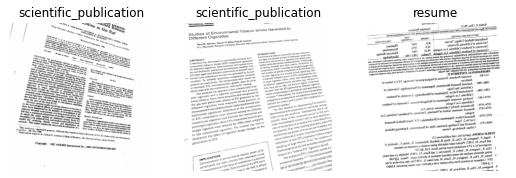

In [43]:
dls.show_batch(nrows=1, ncols=3)